## This is my analysis and feature selection on tabular data (data that uses rows and columns) for a hotel.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv("first inten project.csv")
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [7]:
df['booking status'].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

- let's change the output string into binary 0,1 for classifaction

In [8]:
df['booking status'] = df['booking status'].replace({0:'Not_Canceled',
                               1:'Canceled'})

- now let's drop the useless columns for our model

In [9]:
print(df['room type'].unique(),df['market segment type'].unique(),df['type of meal'].unique())

['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3'] ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary'] ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']


In [10]:
df['room type'] = df['room type'].str.extract('(\d+)').astype(int)

market_segment_mapping = {label: idx for idx, label in enumerate(df['market segment type'].unique())}
df['market segment type'] = df['market segment type'].map(market_segment_mapping)

meal_mapping = {label: idx for idx, label in enumerate(df['type of meal'].unique())}
df['type of meal'] = df['type of meal'].map(meal_mapping)

In [11]:
X = df.drop(columns=['booking status','Booking_ID','date of reservation'], axis=1)
y = df['booking status']

- let's clean the code first check if there's null values

In [12]:
print(df.isnull().sum())

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [13]:
corr = df.corr(numeric_only=True)

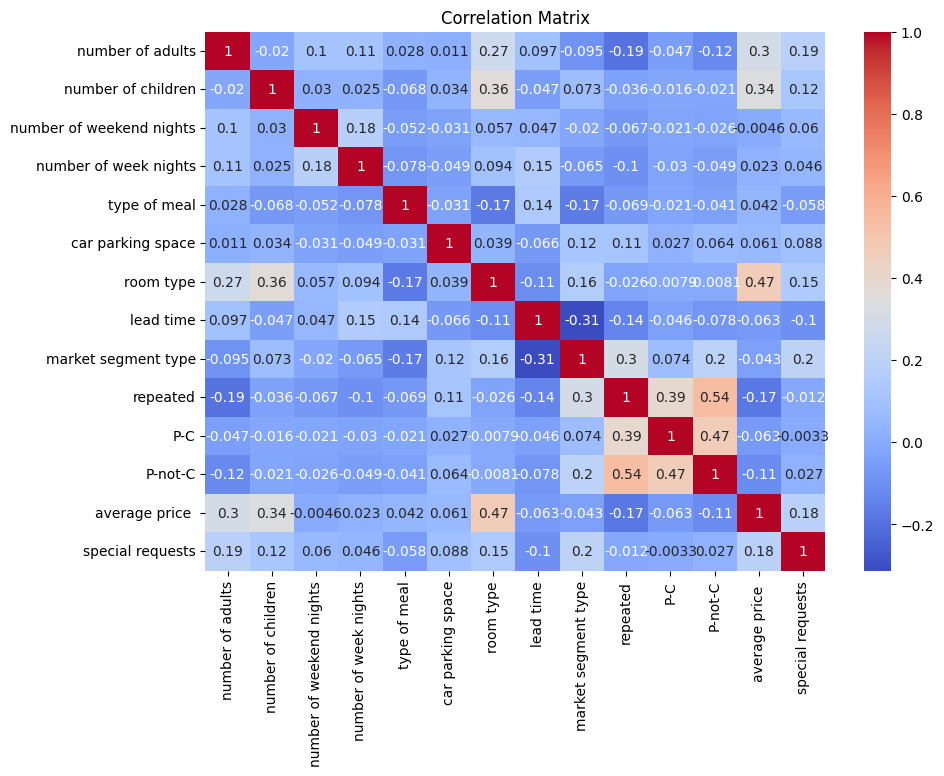

In [14]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- We can see that P-C and P-not-C have correlation with each other and the column repeated